In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
sys.path.append('/Users/wastechs/Documents/git-repos/energy-efficiency')
from lib.util.helper import weekday_time_series
import seaborn as sns
import plotly.express as px
from statsmodels.graphics.tsaplots import plot_acf

In [3]:
df = weekday_time_series(sensor_id='og_3_30T')

In [5]:
px.line(
    x=df.index, y=df.kw, 
    title='UV OG - 3rd Floor',
    labels={
        'x': 'Time',
        'y': 'kW'
    })

In [6]:
time_int_range = np.arange(0, df.shape[0]*30, 30)
df['t'] = time_int_range
df['t_scaled'] = (df['t'] - df['t'].min()) / (df['t'].max() - df['t'].min())

In [29]:
# Short term periodicity interval
df['t_scaled'].iloc[18], df['t_scaled'].iloc[28]

(0.07531380753138076, 0.11715481171548117)

In [31]:
# Long term periodicity interval
df['t_scaled'].iloc[46], df['t_scaled'].iloc[50]

(0.19246861924686193, 0.20920502092050208)

In [23]:
px.line(
    x=df['t_scaled'], y=df.kw, 
    title='Entsorgung',
    labels={
        'x': 'Time',
        'y': 'kW'
    })

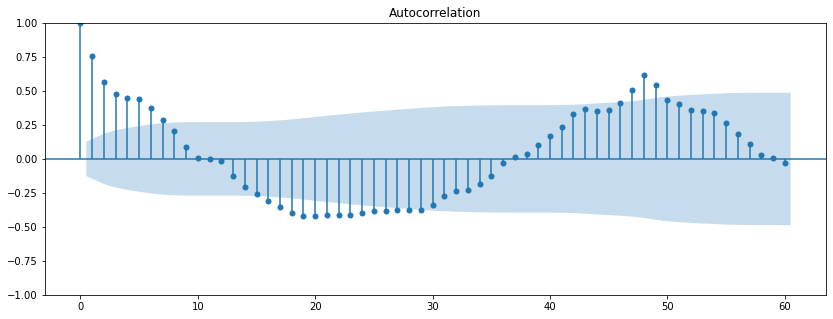

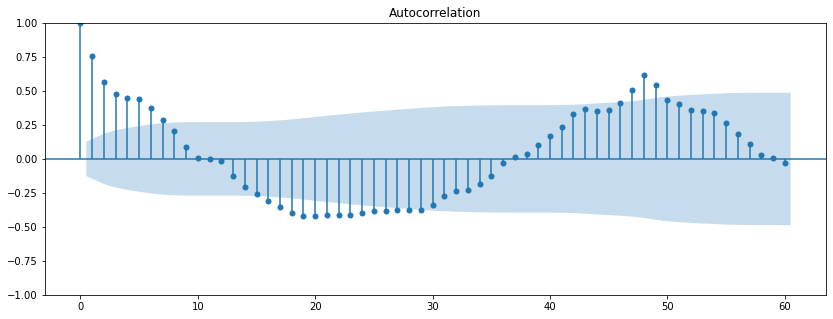

In [28]:
fig, ax = plt.subplots(figsize=(14, 5))
plot_acf(df.kw.values.squeeze(), lags=60, ax=ax)